In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from scipy import stats
import seaborn as sns

In [2]:
daily_data = pd.read_csv("daily_data.csv")
daily_data.set_index("date", inplace = True)

X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")


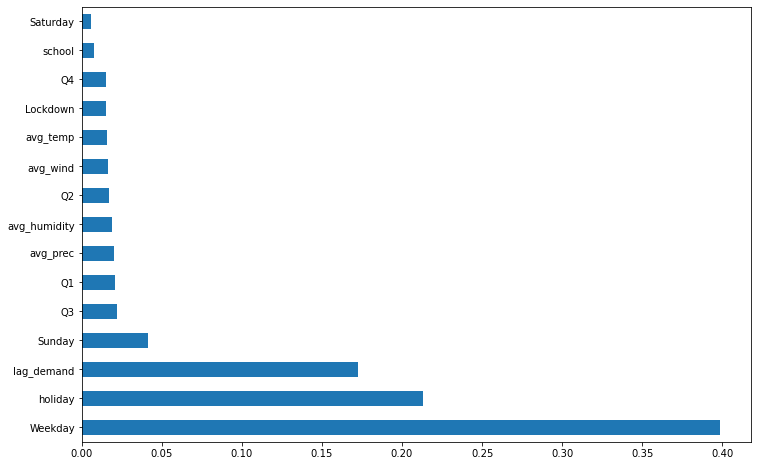

In [3]:
from xgboost import XGBRegressor
selection = XGBRegressor()
selection.fit(X_train, y_train)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=daily_data.columns[1:])
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [4]:
import numpy as np
from sklearn.metrics import r2_score

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

def adj_r2(actual, pred, i):
    return 1 - ((1-r2_score(actual,pred))*(len(actual)-1)/(len(actual)-i-1))

### Gradient Boosting with Randomized Search CV

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV


gradientboost = GradientBoostingRegressor()


learning_rate = [0.05, 0.001, 0.1, 0.2]
loss = ['ls','huber']
n_estimators = [100, 500, 900, 300]
max_depth = [2, 3, 5, 7]
min_samples_leaf = [1, 2, 4, 6, 8] 
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]


params = {'learning_rate': learning_rate,
    'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features}

gb_random = RandomizedSearchCV(estimator=gradientboost,
            param_distributions= params,
            cv=3, n_iter=300,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 1, 
            return_train_score = True,
            random_state=42)


In [6]:
for i in range(7,16):
    Xtrain_best = X_train[feat_importances.nlargest(i).index]
    gb_random.fit(Xtrain_best, y_train)
    Xtest_best = X_test[feat_importances.nlargest(i).index]
    
    y_pred= gb_random.predict(Xtest_best)

    y_pred_train = gb_random.predict(Xtrain_best)

    
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)



    from sklearn.metrics import r2_score
    print(i,"features: ")
    print(gb_random.best_params_)

    print("RMSE for test set is: ",(mse**(1/2)))
    print("RMSE for train set is: ", (mse_train**(1/2)))
    
    r2_adjtest = adj_r2(y_test, y_pred,i)
    r2_adjtrain = adj_r2(y_train, y_pred_train,i)
   
    print("Adjusted R2 score for test: ",r2_adjtest)
    print("Adjusted R2 score for training: ",r2_adjtrain)
    
    mape_test = mape(y_test, y_pred)
    mape_train = mape(y_train, y_pred_train)
    
   
    print("MAPE for test: ",mape_test)
    print("MAPE for training: ",mape_train)
    

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  4.8min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


7 features: 
{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3, 'loss': 'ls', 'learning_rate': 0.05}
RMSE for test set is:  1219.90218874735
RMSE for train set is:  1159.2588586882441
Adjusted R2 score for test:  0.7187600682401623
Adjusted R2 score for training:  0.7288499321876845
MAPE for test:  8.399309322535938
MAPE for training:  8.123346018429629
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  5.6min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


8 features: 
{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'loss': 'huber', 'learning_rate': 0.05}
RMSE for test set is:  1184.0916789484936
RMSE for train set is:  969.4003816254219
Adjusted R2 score for test:  0.7343500297724908
Adjusted R2 score for training:  0.8102731419061215
MAPE for test:  8.550436782413664
MAPE for training:  8.288771314246107
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  5.3min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


9 features: 
{'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 5, 'loss': 'huber', 'learning_rate': 0.05}
RMSE for test set is:  1175.0881769213227
RMSE for train set is:  959.9813295722123
Adjusted R2 score for test:  0.7377019679309216
Adjusted R2 score for training:  0.8138248299759068
MAPE for test:  8.561979863053635
MAPE for training:  8.305720697461807
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  6.5min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


10 features: 
{'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 5, 'loss': 'huber', 'learning_rate': 0.05}
RMSE for test set is:  1158.0543882651516
RMSE for train set is:  945.295977127302
Adjusted R2 score for test:  0.7445946984459868
Adjusted R2 score for training:  0.8193634118895121
MAPE for test:  8.569446965638571
MAPE for training:  8.296067967177482
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  6.1min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


11 features: 
{'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 5, 'loss': 'huber', 'learning_rate': 0.1}
RMSE for test set is:  1182.8902633534162
RMSE for train set is:  796.3442126559933
Adjusted R2 score for test:  0.7328337040917261
Adjusted R2 score for training:  0.8717238703175317
MAPE for test:  8.699999200525884
MAPE for training:  8.455099985974543
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  6.1min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


12 features: 
{'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 7, 'loss': 'huber', 'learning_rate': 0.05}
RMSE for test set is:  1105.764754712157
RMSE for train set is:  711.2834954245028
Adjusted R2 score for test:  0.7659320768598842
Adjusted R2 score for training:  0.8975990662223032
MAPE for test:  8.654287005369726
MAPE for training:  8.447453815172574
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  6.0min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


13 features: 
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'loss': 'ls', 'learning_rate': 0.1}
RMSE for test set is:  1098.8325200323761
RMSE for train set is:  740.8639744835303
Adjusted R2 score for test:  0.7682573341451557
Adjusted R2 score for training:  0.8888345465220694
MAPE for test:  8.710108822287022
MAPE for training:  8.51794375891533
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  6.1min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


14 features: 
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'loss': 'ls', 'learning_rate': 0.1}
RMSE for test set is:  1102.0515129995285
RMSE for train set is:  778.6573160890832
Adjusted R2 score for test:  0.7662905431169629
Adjusted R2 score for training:  0.8771259322412929
MAPE for test:  8.764566039951166
MAPE for training:  8.487340631081679
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  6.7min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


15 features: 
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 3, 'loss': 'ls', 'learning_rate': 0.05}
RMSE for test set is:  1125.0098327683481
RMSE for train set is:  874.8833161291925
Adjusted R2 score for test:  0.7558157868278144
Adjusted R2 score for training:  0.8447818327164055
MAPE for test:  8.78753848903384
MAPE for training:  8.427262980098359


In [7]:
# We get the best results with 15 features

### Final Gradient Boosting Model

In [8]:


regressor = GradientBoostingRegressor(n_estimators= 300, min_samples_split=10, min_samples_leaf=1,
                                          max_features = 'auto', max_depth=3, loss= 'ls', learning_rate= 0.05)

Xtrain_best = X_train[feat_importances.nlargest(15).index]
regressor.fit(Xtrain_best, y_train)
Xtest_best = X_test[feat_importances.nlargest(15).index]
    
y_pred= regressor.predict(Xtest_best)


    
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("RMSE for test set is: ",(mse**(1/2)))
  
r2_adjtest = adj_r2(y_test, y_pred,15)

   
print("Adjusted R2 score for test: ",r2_adjtest)

mape_test = mape(y_test, y_pred)

print("MAPE for test: ",mape_test)


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RMSE for test set is:  1124.5715810856068
Adjusted R2 score for test:  0.7560059954736952
MAPE for test:  8.787204798435903


<Figure size 1440x1440 with 0 Axes>

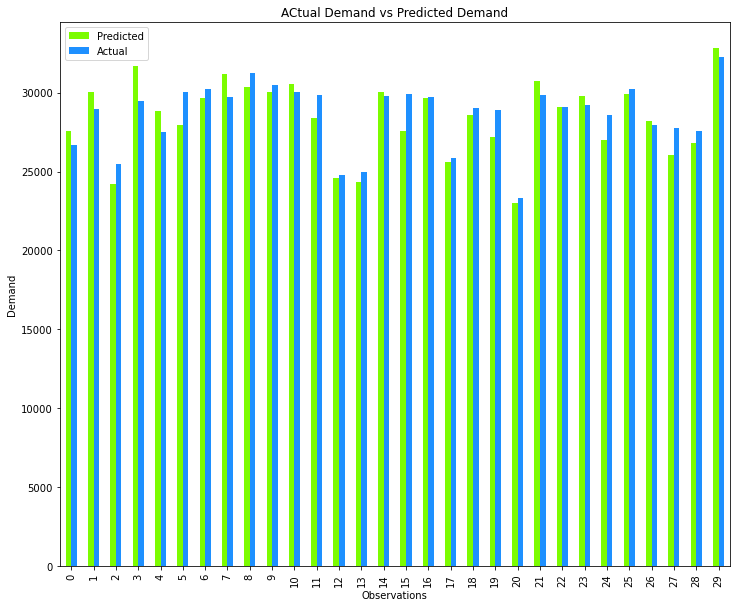

In [9]:
plt.figure(figsize= (20,20))
df = pd.concat([y_test, pd.DataFrame(y_pred)], axis = 1)
df.columns = {"Actual","Predicted"}

df.head(30).plot(kind='bar',figsize=(12,10),color = {"dodgerblue","lawngreen"})
plt.title("ACtual Demand vs Predicted Demand")
plt.xlabel("Observations")
plt.ylabel("Demand")
plt.show()